In [29]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


 Missing Values:
 Survival_Status     0
Passenger_Class     0
Full_Name           0
Gender              0
Passenger_Age       0
Family_Aboard       0
Parents_Children    0
Ticket_Fare         0
dtype: int64

 Unique Value Counts:
 Survival_Status       2
Passenger_Class       3
Full_Name           887
Gender                2
Passenger_Age        89
Family_Aboard         7
Parents_Children      7
Ticket_Fare         248
dtype: int64

 Summary Statistics:
        Survival_Status  Passenger_Class  Passenger_Age  Family_Aboard  \
count       887.000000       887.000000     887.000000     887.000000   
mean          0.385569         2.305524      29.471443       0.525366   
std           0.487004         0.836662      14.121908       1.104669   
min           0.000000         1.000000       0.420000       0.000000   
25%           0.000000         2.000000      20.250000       0.000000   
50%           0.000000         3.000000      28.000000       0.000000   
75%           1.000000       

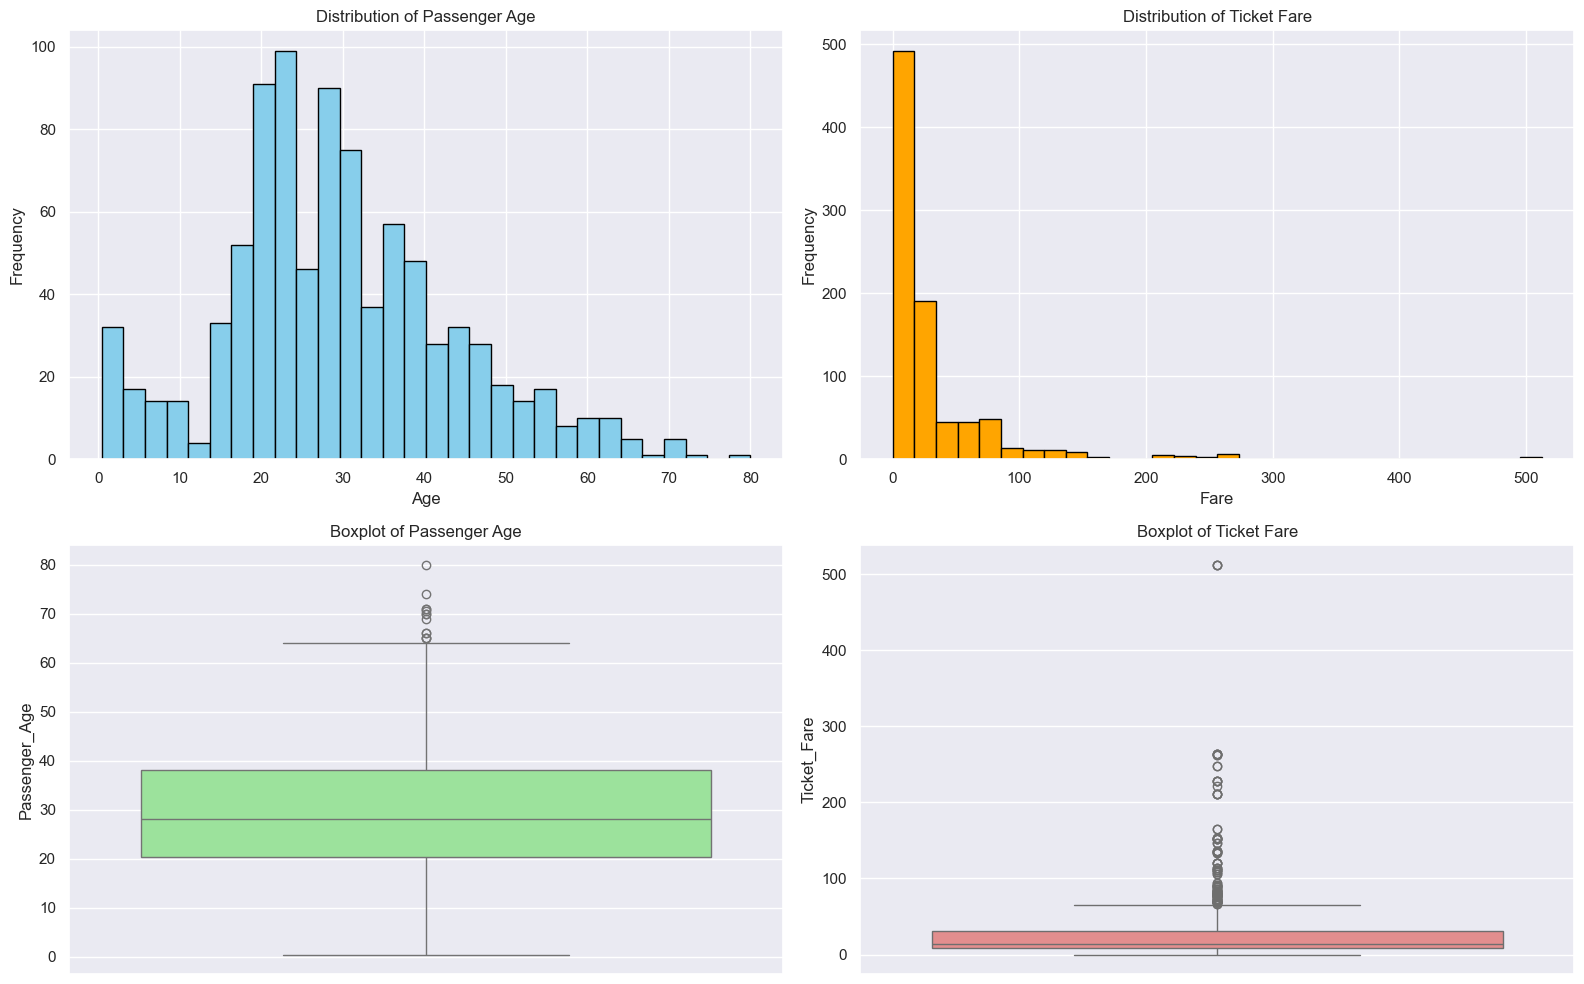

In [39]:
# Load CSV
df = pd.read_csv("titanic.csv")

# Rename columns
df = df.rename(columns={
    'Survived': 'Survival_Status',
    'Pclass': 'Passenger_Class',
    'Name': 'Full_Name',
    'Sex': 'Gender',
    'Age': 'Passenger_Age',
    'Siblings/Spouses Aboard': 'Family_Aboard',
    'Parents/Children Aboard': 'Parents_Children',
    'Fare': 'Ticket_Fare'
})

# Data Insights 

print("\n Missing Values:\n", df.isnull().sum())
print("\n Unique Value Counts:\n", df.nunique())
print("\n Summary Statistics:\n", df.describe())
print("\n Correlation Matrix:\n", df[['Passenger_Age', 'Ticket_Fare', 'Family_Aboard', 'Parents_Children']].corr())

# Outlier Detection 

# For Ticket_Fare
Q1_fare = df['Ticket_Fare'].quantile(0.25)
Q3_fare = df['Ticket_Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
fare_outliers = df[(df['Ticket_Fare'] < Q1_fare - 1.5 * IQR_fare) | (df['Ticket_Fare'] > Q3_fare + 1.5 * IQR_fare)]

# For Passenger_Age
Q1_age = df['Passenger_Age'].quantile(0.25)
Q3_age = df['Passenger_Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
age_outliers = df[(df['Passenger_Age'] < Q1_age - 1.5 * IQR_age) | (df['Passenger_Age'] > Q3_age + 1.5 * IQR_age)]

print("\n Number of Age Outliers:", age_outliers.shape[0])
print(age_outliers[['Full_Name', 'Passenger_Age']].head())

print("\n Number of Fare Outliers:", fare_outliers.shape[0])
print(fare_outliers[['Full_Name', 'Ticket_Fare']].head())

#  Visualization 

plt.figure(figsize=(16, 10))

# Histogram for Age
plt.subplot(2, 2, 1)
plt.hist(df['Passenger_Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for Fare
plt.subplot(2, 2, 2)
plt.hist(df['Ticket_Fare'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Ticket Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Boxplot for Age
plt.subplot(2, 2, 3)
sns.boxplot(y=df['Passenger_Age'], color='lightgreen')
plt.title('Boxplot of Passenger Age')

# Boxplot for Fare
plt.subplot(2, 2, 4)
sns.boxplot(y=df['Ticket_Fare'], color='lightcoral')
plt.title('Boxplot of Ticket Fare')

plt.tight_layout()
plt.show()

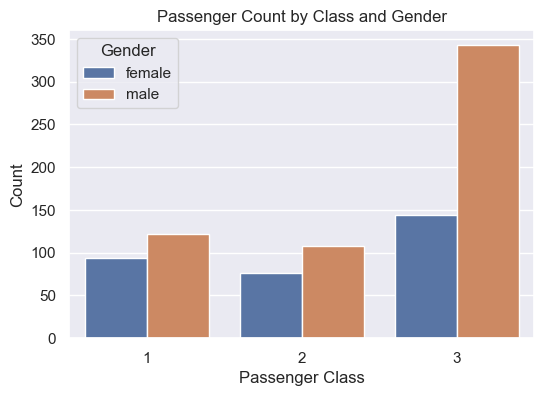

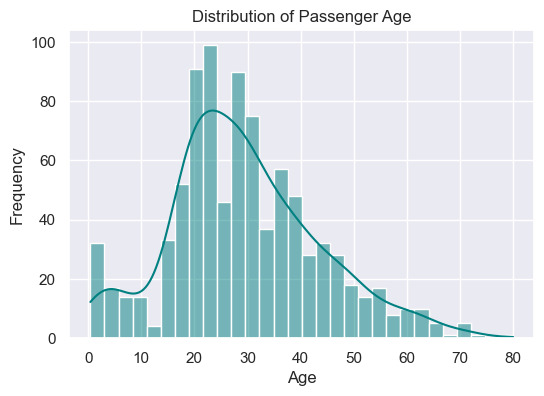

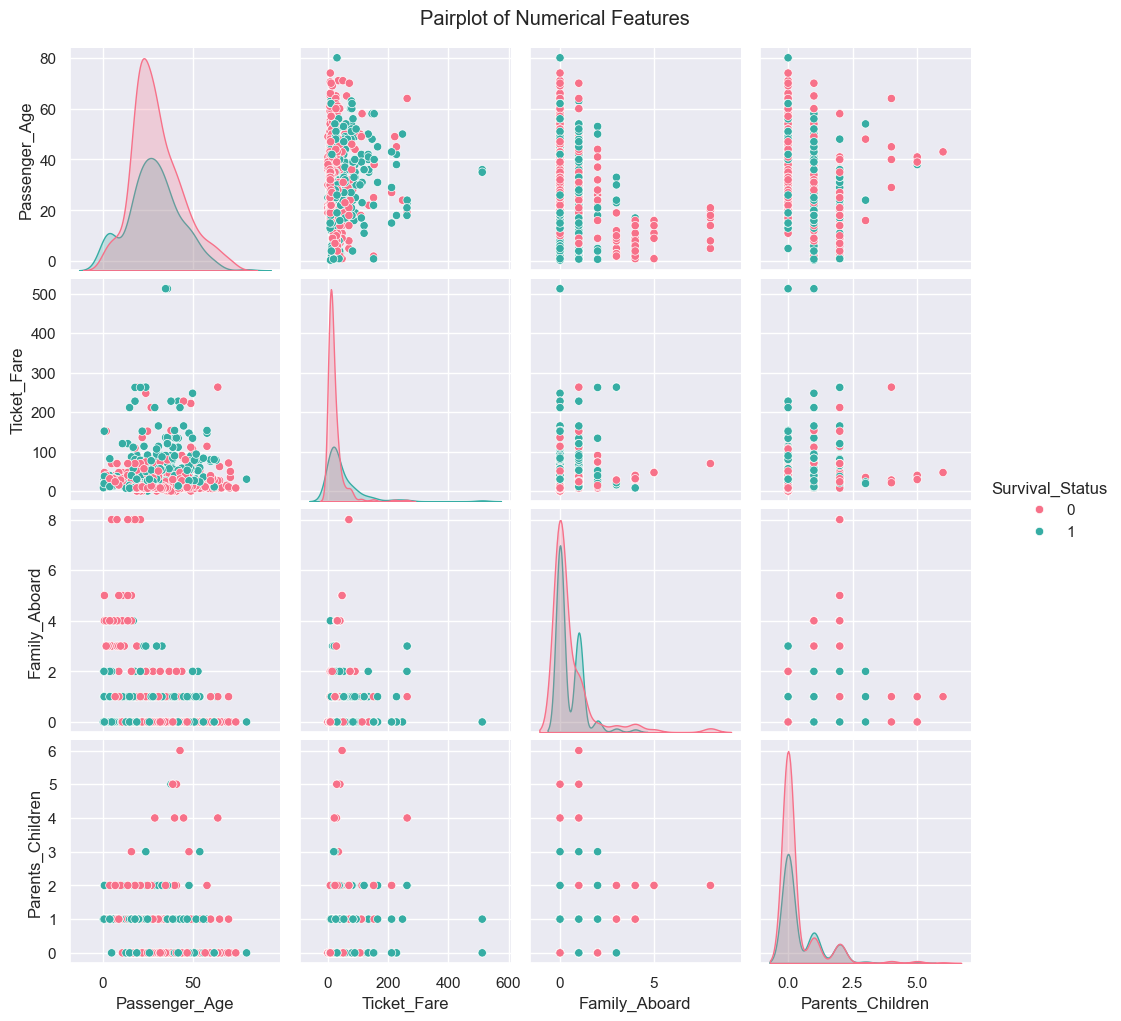

In [ ]:
# Set seaborn theme
sns.set(style="darkgrid")

# COUNT PLOT 
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Passenger_Class', hue='Gender')
plt.title('Passenger Count by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# HIST PLOT 
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Passenger_Age', bins=30, kde=True, color='teal')
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# PAIR PLOT 
# Select subset of columns for pairplot
subset = df[['Passenger_Age', 'Ticket_Fare', 'Family_Aboard', 'Parents_Children', 'Survival_Status']]
sns.pairplot(subset, hue='Survival_Status', palette='husl')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()



 Covariance Matrix:
                   Passenger_Class    Gender  Passenger_Age  Family_Aboard  \
Passenger_Class          0.700003  0.051845      -4.625577       0.078584   
Gender                   0.051845  0.228943       0.620805      -0.059859   
Passenger_Age           -4.625577  0.620805     199.428297      -4.643648   
Family_Aboard            0.078584 -0.059859      -4.643648       1.220293   
Parents_Children         0.013681 -0.094401      -2.209222       0.369498   
Ticket_Fare            -22.862898 -4.314629      78.968988       8.734998   

                  Parents_Children  Ticket_Fare  
Passenger_Class           0.013681   -22.862898  
Gender                   -0.094401    -4.314629  
Passenger_Age            -2.209222    78.968988  
Family_Aboard             0.369498     8.734998  
Parents_Children          0.652001     8.661314  
Ticket_Fare               8.661314  2478.251546  


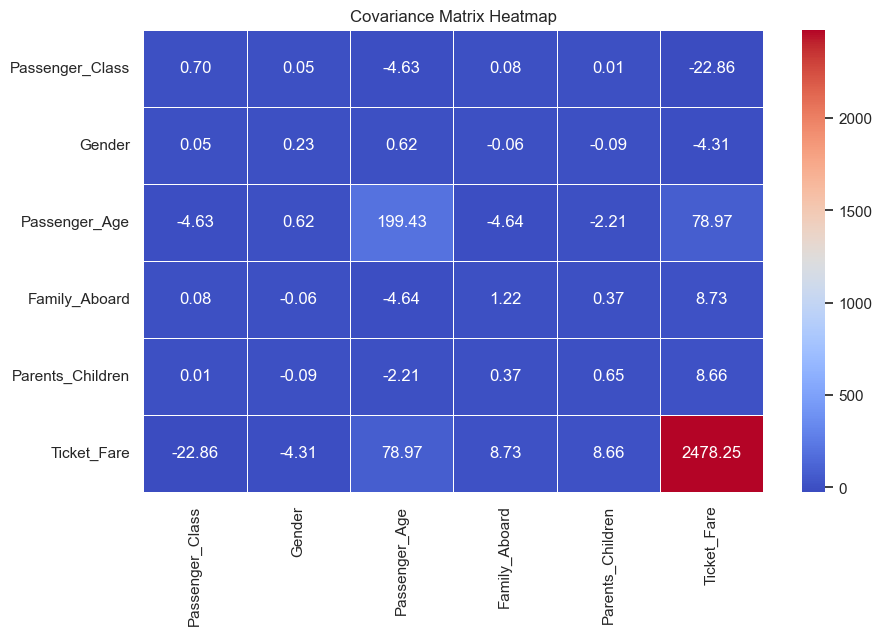


 KNN Accuracy: 0.69
 KNN Predicted Survivors: 58 out of 178
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       111
           1       0.60      0.52      0.56        67

    accuracy                           0.69       178
   macro avg       0.67      0.66      0.66       178
weighted avg       0.68      0.69      0.69       178


 Decision Tree Accuracy: 0.74
 Decision Tree Predicted Survivors: 74 out of 178
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       111
           1       0.64      0.70      0.67        67

    accuracy                           0.74       178
   macro avg       0.72      0.73      0.72       178
weighted avg       0.74      0.74      0.74       178



In [43]:
# Convert Gender to numeric for covariance calculation
df['Gender'] = df['Gender'].map({'female': 0, 'male': 1})

# covariance 
cov_matrix = df[['Passenger_Class', 'Gender', 'Passenger_Age', 'Family_Aboard', 'Parents_Children', 'Ticket_Fare']].cov()
print("\n Covariance Matrix:\n", cov_matrix)

# COVARIANCE HEATMAP
plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()


# MACHINE LEARNING MODELS 

# Feature matrix and target
features = ['Passenger_Class', 'Gender', 'Passenger_Age', 'Family_Aboard', 'Parents_Children', 'Ticket_Fare']
X = df[features]
y = df['Survival_Status']
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_preds)
print(f"\n KNN Accuracy: {knn_accuracy:.2f}")
print(f" KNN Predicted Survivors: {sum(knn_preds)} out of {len(knn_preds)}")
print(classification_report(y_test, knn_preds))

# Decision Tree 
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f"\n Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f" Decision Tree Predicted Survivors: {sum(dt_preds)} out of {len(dt_preds)}")
print(classification_report(y_test, dt_preds))
